## VeL-Ui Framework 

### Introduction 

This tutorial will guide you through VelUI, a graphical interface built on top of the LogView framework. VelUI allows you to visually build and evaluate queries on event logs. LogView, on the other hand, provides the foundational commands for programmatically querying event log data.

You can either use VelUI’s visual tools or work directly with LogView’s functions—whichever suits your workflow. Let’s begin by setting up the VelUI and understanding how it integrates with LogView.




### Loading the VelUI 

First, ensure you have the necessary dependencies installed :

- dash==2.0.0
- jupyter-dash==0.4.0
- dash-bootstrap-components
- feffery-antd-components==0.3.2



### Setting Up the LogView Library

To use the LogView library in this project, we need to ensure that Python can locate it. If the library is not installed as a package but is instead a local module in a specific directory, we can add that directory to the Python path manually.


In [1]:
import sys
import os

# Add the path to your module to Logview Library
path_to_your_module = os.path.dirname(os.getcwd())
sys.path.insert(0, path_to_your_module)

## Read an event log file ##
For this tutorial, we use the Road Traffic Fine Management (RTFM) event log, which records data about the process of managing and handling road traffic fines by a local police force in Italy. The RTFM log contains 561,470 events grouped into 150,370 cases recorded between January 2000 and June 2013, including 11 different activities and 12 data attributes.

More details about the event log can be found [here](https://link.springer.com/article/10.1007/s00607-015-0441-1#Sec8).\
The event log used in this tutorial is already provided in the dataset folder.\
The raw event log files can also be downloaded [here](https://data.4tu.nl/articles/dataset/Road_Traffic_Fine_Management_Process/12683249?file=24018146).



In [2]:
from dash import jupyter_dash
from dash import Dash, html, dcc, callback, Output, Input
from Vel import Vel
import constants


vel_instance = Vel(logName="Road_Traffic_Fine_Management_Process")

The Vel class is initialized with the path to a log file, automatically reads it, and prepares it for analysis. The initialization also sets up default column names for the case ID, timestamp, and activity columns.

Using `Changing Default Column Names()`:

The changeDefaultNames method allows you to manually define the specific columns in your dataframe that correspond to the case ID, timestamp, and activity. This is essential for ensuring the LogView framework correctly interprets your event log data.

In [ ]:
vel_instance.changeDefaultNames("New Case ID", "New Timestamp", "New Activity")
vel_instance.CASE_ID_COL

'New Case ID'

Using `setLog()`:

The setLog method allows you to visualize the columns and map your event log columns (Case ID, Timestamp, and Activity) and initialize the LogView directly through a web-based UI.

- Column Selection: Choose the appropriate columns directly from the table.
- Role Assignment: Assign selected columns to the Case ID, Timestamp, and Activity roles interactively.

In [4]:
from dash import jupyter_dash
from dash import Dash, html, dcc, callback, Output, Input
from Vel import Vel
import constants

app = vel_instance.setLog()

app.run_server(mode='inline', port=constants.SETLOGPORT, debug=True)

### Instantiating a LogView object ###

The LogViewBuilder class allows instantiating a LogView object, which serves as the central interface for creating LogView instances. It provides a single point of access for interacting with the different framework components.

`initLogView()`:
The initLogView method simplifies the process of initializing a LogView object from raw event log data

In [5]:
vel_instance.initLogView()

### How to run your first query with the Logview Query Evaluator  ###

The Logview _Query_ class allows you to create a query as a conjunction of predicates. It also prompts the user to give the query an identifier, which is used to record the query in the registry.

The _evaluate_query_ method implements our _Query Evaluator_: it evaluates a given query against a source protocol, which is a DataFrame containing event data. It returns a result set and its complement, prompting the user to provide an identifier for the query and result set, which is used to record the result set in the registry.

In the example below, the user runs a query with two predicates:
- `EqToConstant('Activity', 'Send for Credit Collection')`, which checks if the case has at least one event where Activity = 'Send for Credit Collection'
- `NotEqToConstant('Activity', 'Payment')`, which checks that the case does not have any event where Activity = 'Payment'.


The `log_view.evaluate_query()` method evaluates the query on the entire log `log`, producing a result set (`result_set_query_t`) and its complement `complement_t`.
- `'SCC_and_no_Payment'` is the identifier of the query provided by the user;
- `'rs_SCC_and_no_Payment'` is the identifier of the result set provided by the user.

These identifiers are recorded in the Registry and can be used aside of variable names to retrieve result sets of interest for characterization and comparison, as shown below.

In [ ]:
from logview.predicate import *

query_r = Query('SCC', EqToConstant('Activity', 'Send for Credit Collection'))
result_set_query_r, complement_result_set_query_r = vel_instance.log_view.evaluate_query('rs_SCC', vel_instance.log, query_r)
result_set_query_r

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
2,A100,Create Fine,561.0,2006-08-02 00:00:00+00:00,Variant 1,1,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A100,Create Fine,2006-08-02 00:00:00+00:00,2,1
3,A100,Send Fine,NaN,2006-12-12 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,11.00,...,NaN,NaN,NaN,NaN,NaN,A100,Send Fine,2006-12-12 00:00:00+00:00,3,1
4,A100,Insert Fine Notification,NaN,2007-01-15 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+00:00,4,1
5,A100,Add penalty,NaN,2007-03-16 00:00:00+00:00,Variant 1,1,71.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Add penalty,2007-03-16 00:00:00+00:00,5,1
6,A100,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+00:00,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,V9999,Create Fine,25.0,2002-09-07 00:00:00+00:00,Variant 1,1,131.0,142.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,V9999,Create Fine,2002-09-07 00:00:00+00:00,561465,150369
561466,V9999,Send Fine,NaN,2002-10-25 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,15.16,...,NaN,NaN,NaN,NaN,NaN,V9999,Send Fine,2002-10-25 00:00:00+00:00,561466,150369
561467,V9999,Insert Fine Notification,NaN,2002-11-04 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,V9999,Insert Fine Notification,2002-11-04 00:00:00+00:00,561467,150369
561468,V9999,Add penalty,NaN,2003-01-03 00:00:00+00:00,Variant 1,1,262.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,V9999,Add penalty,2003-01-03 00:00:00+00:00,561468,150369


### Query Builder

The Query Builder UI is designed to make it easy for users to build and run queries without needing to write code manually

`Query_Builder` creates a web application using Dash that serves as a visual query builder. Users can add queries, select predicates, configure conditions, and execute queries—all within an intuitive UI. The method handles everything from setting up the layout to managing callbacks that update the UI based on user interactions.

One of the core features of Query_Builder is its ability to dynamically manage queries

- Multiple Query Tabs: Users can create, manage, and switch between multiple queries using dynamically generated tabs.

- Dynamic Input Fields: Input fields adjust dynamically based on the selected predicate, allowing users to provide the necessary parameters

- Updating Conditions: The method provides detailed UI elements for configuring conditions within each query, such as selecting attributes, setting values, and defining predicates.

- Query Preview: The UI displays a real-time preview of the query string as users configure conditions and select predicates

- Query Execution and Results Display: Execute queries directly from the UI, and the results are displayed.

- Query Summary: Shows the summary of the queries that have been run.

### How to run your first query with the Query Builder UI ###

To begin using the Query Builder UI the following method has to be executed:
`run_Query_Builder()` 

This command will launch the Query Builder UI in your default web browser. The UI interface allows you to visually create and manage your queries.



In [ ]:
vel_instance.run_Query_Builder()

##### Creating a New Query
When the Query Builder UI loads, you will see an interface a new query tab open and an option in the tabs to add a new query as well.

Add a Query Tab: Click on the "Add Query" button to create a new query tab. This will be where you will configure your new query.

Each query is contained within its own tab, allowing you to manage and compare multiple queries simultaneously.



##### Naming Your Query
In the "Query Name" field, enter a name for your query. This helps you keep track of different queries, especially when working with multiple tabs.

##### Adding Labels to Queries
Labels are useful for categorizing and filtering your queries. You can add labels to your queries in the Query Builder UI to make them easier to identify and manage later.

To add a label, click on the "+ Add Label" button in the query tab, enter your label name, and press ENTER to save it.




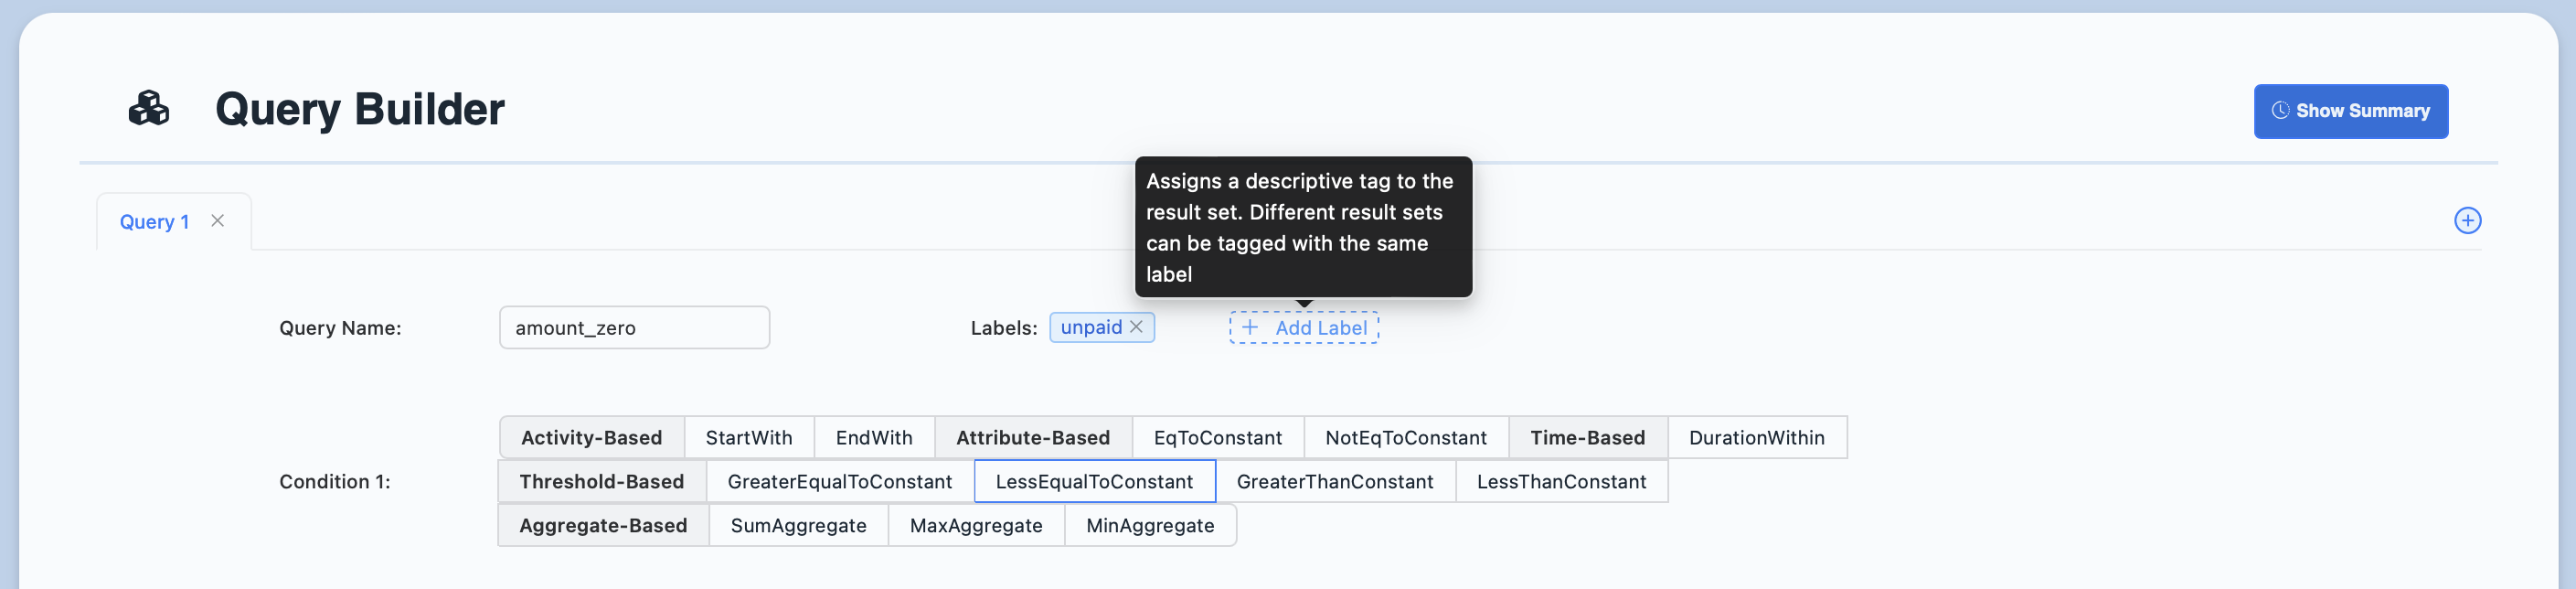

##### Selecting a Predicate
In the "Condition" section, start by selecting a predicate from the available options. A predicate is a condition that defines what you want to evaluate in your query. The Query Builder UI supports various predicates, grouped by their types, such as

- `EqToConstant`: Keeps cases that contain at least an event with the given attribute equal to a constant value.
- `NotEqToConstant`: Keeps cases that do not contain any event with the given attribute equal to a constant value.
- `GreaterEqualToConstant`: Keeps cases that contain at least an event with the given attribute greater than or equal to a constant value.
- `GreaterThanConstant`: Keeps cases that contain at least an event with the given attribute greater than a constant value.
- `LessEqualToConstant`: Keeps cases that contain at least an event with the given attribute lower than or equal to a constant value.
- `LessThanConstant`: Keeps cases that contain at least an event with the given attribute lower than a constant value.
- `StartWith`: Keeps cases starting with the specified activities.
- `EndWith`: Keeps cases ending with a given activity.
- `DurationWithin`: Keeps cases with durations within a specified range in seconds.
- `SumAggregate`: Sums the values of the specified attribute, grouping by the specified columns.
- `MaxAggregate`: Finds the maximum value of the specified attribute, grouping by the specified columns.
- `MinAggregate`: Finds the minimum value of the specified attribute, grouping by the specified columns.

Examples: 

- `EndWith(['Send Fine', 'Appeal to Judge'])` retrieves all the cases that end with activity 'Send Fine' or 'Appeal to Judge'.
- `LessEqualToConstant('amount', '100')` retrieves all the cases where there is at least an event with attribute amount ≤ 100.

Use the buttons to choose the predicate that best suits your needs


Once you have selected a predicate, provide additional configurations depending on the predicate chosen. These typically include:

Attribute Key: The specific attribute or column in the log file you want to evaluate (e.g., "Activity", "Case ID").
Values: The specific value or values you are checking for within the selected attribute (e.g., "Send for Credit Collection").



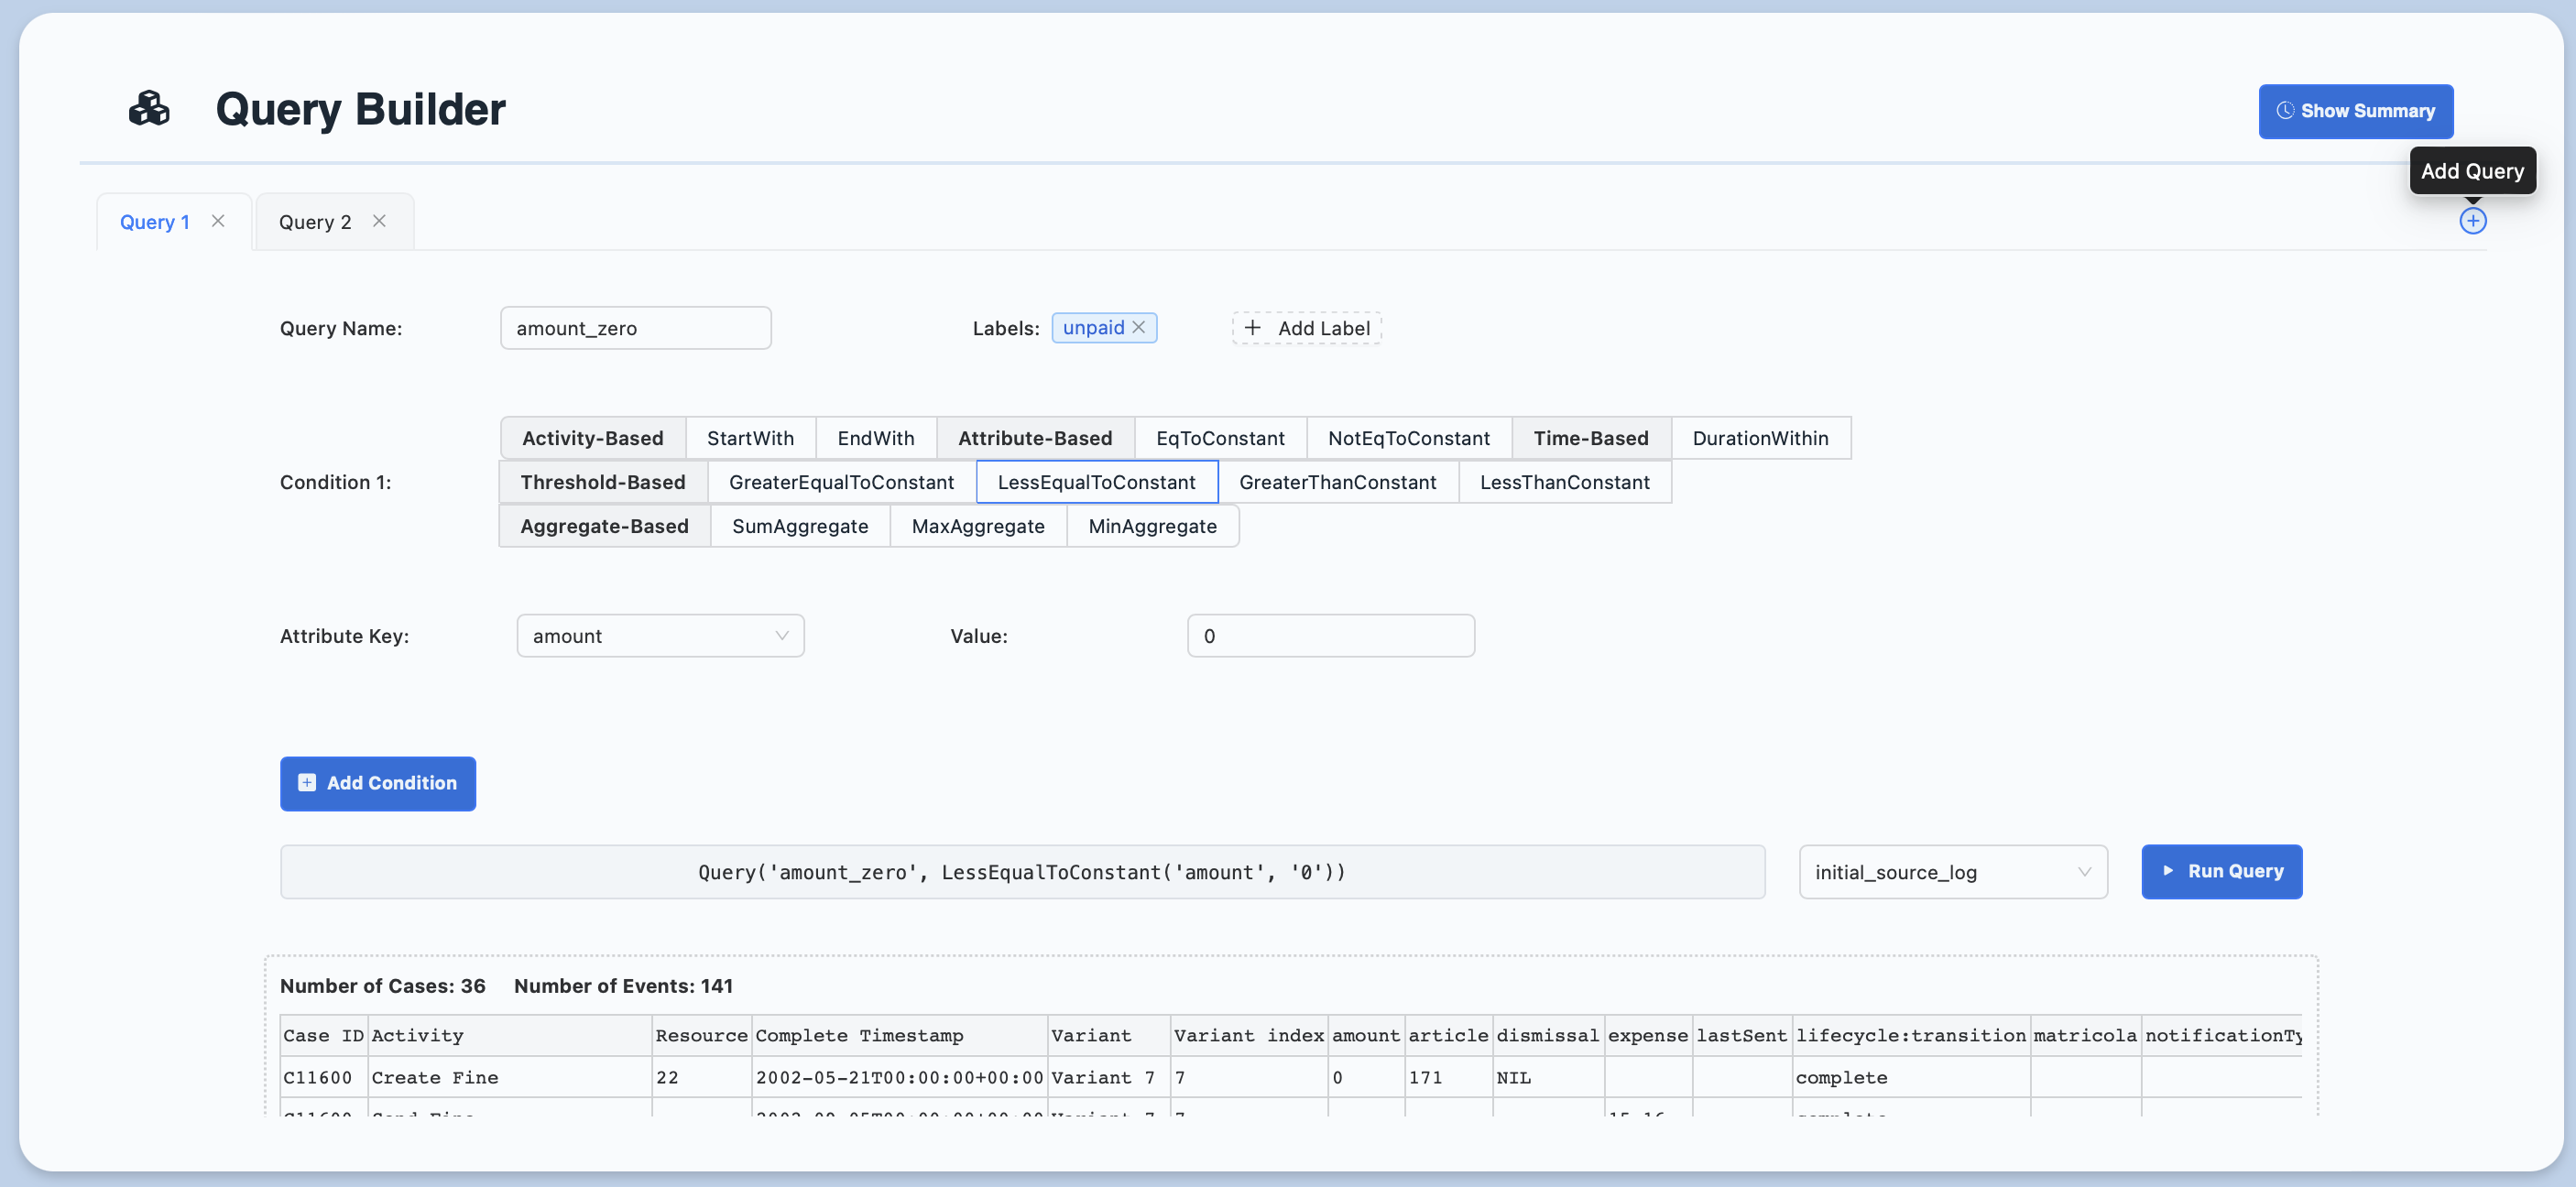

#### Log selection

Before running the query, you must specify the log to be used.

Select a Log: Use the dropdown menu located at the bottom of the interface to select the log on which you want to run the query. This list shows all the result sets obtained from the past queries

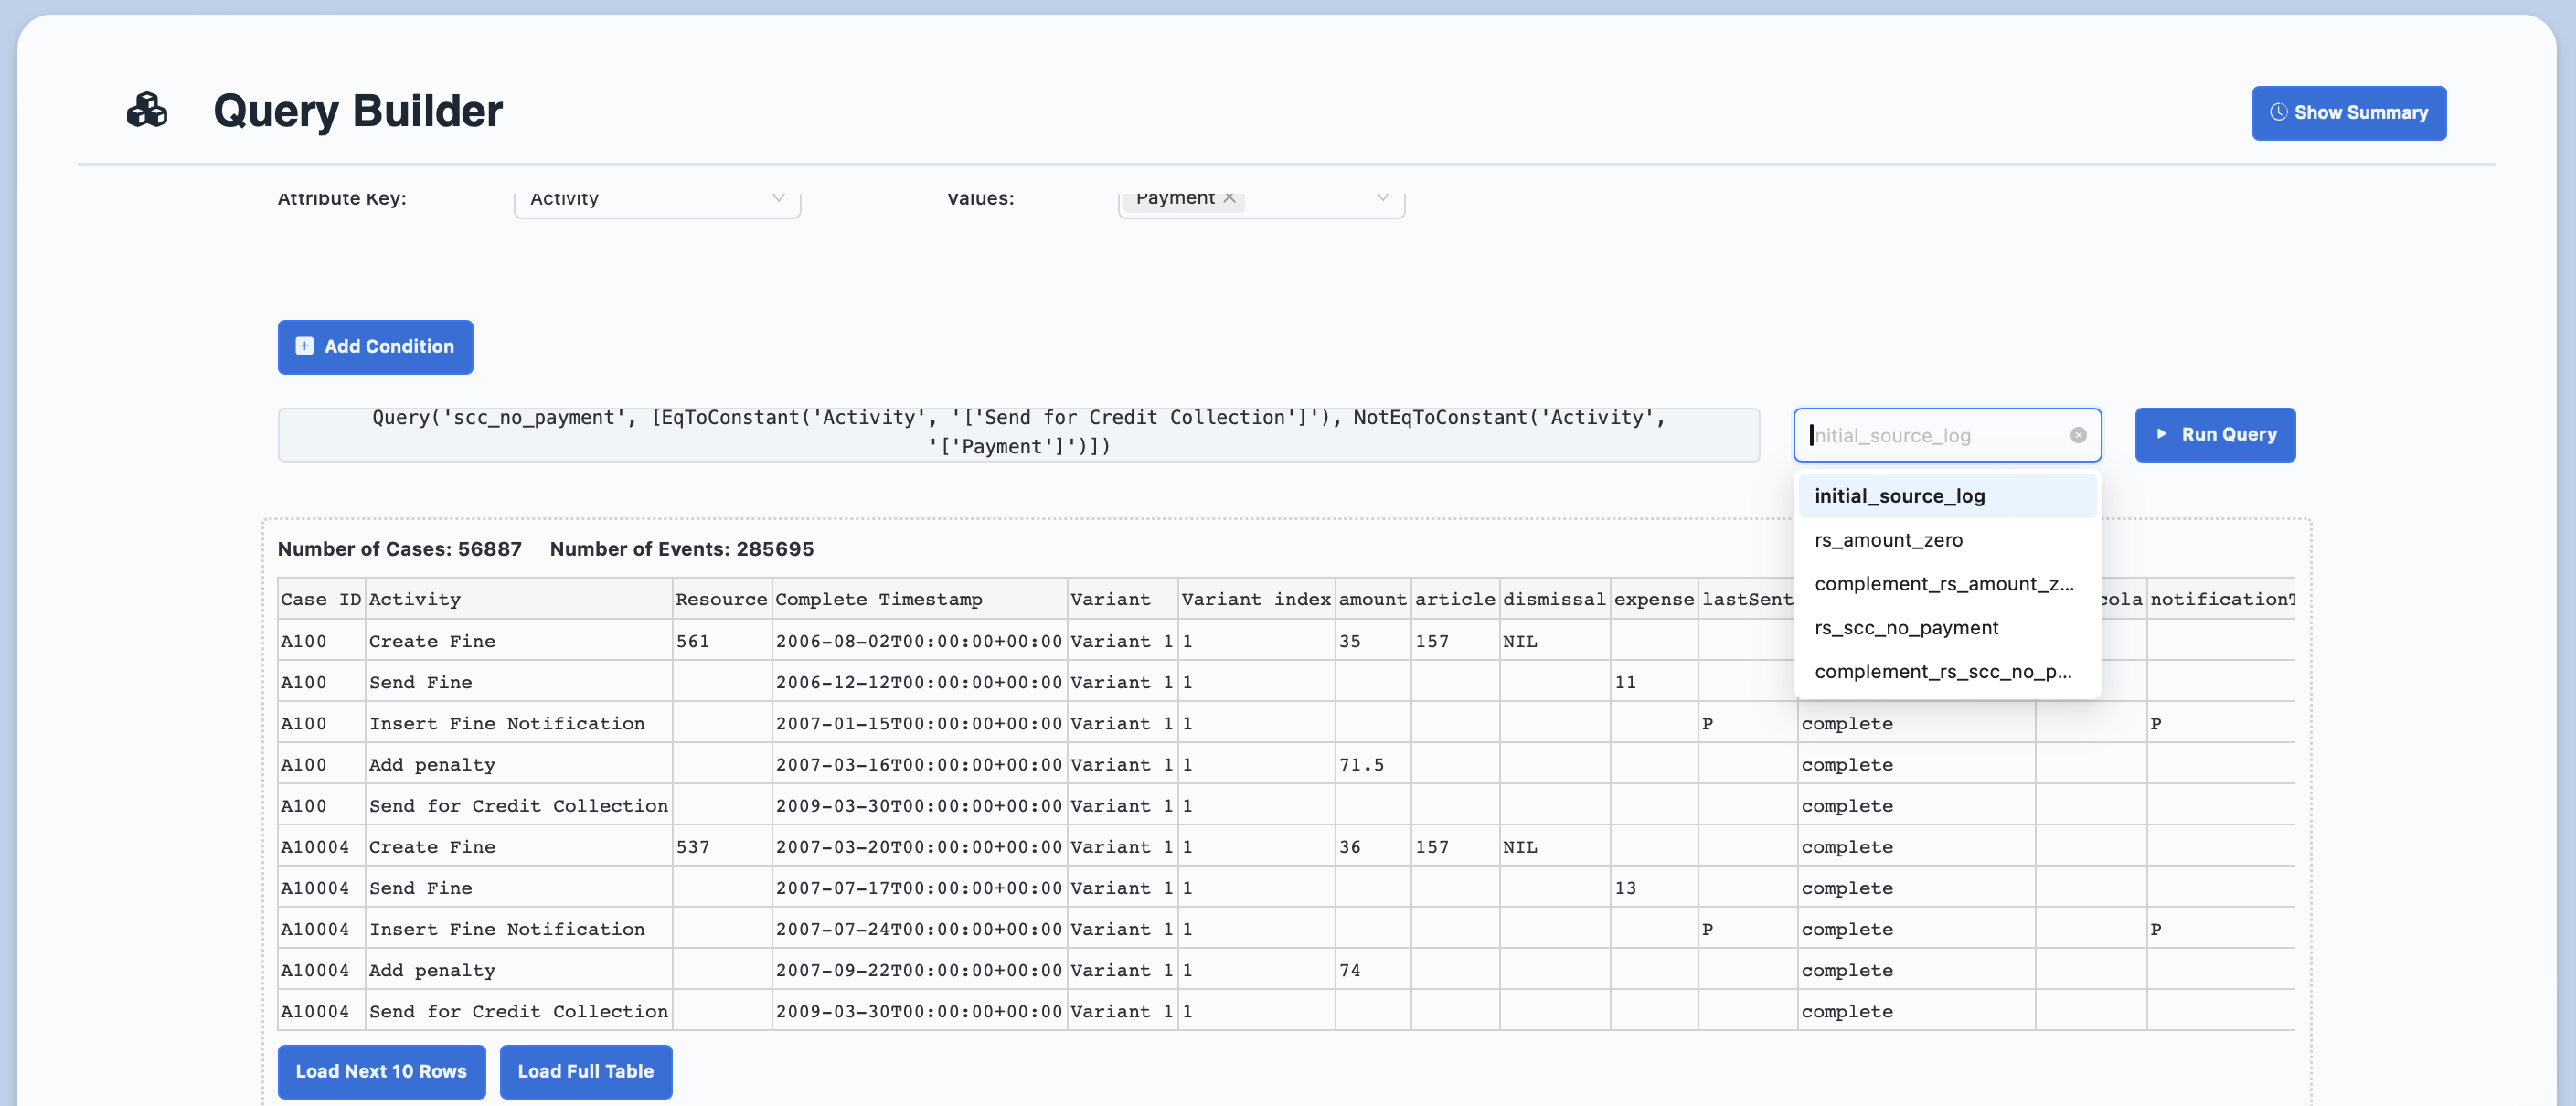

##### Reviewing the Query
As you configure the query, the Query Builder UI will display a real-time preview of the query string in the "Query Preview" section at the bottom of the interface. This preview helps you verify that the query is being constructed as expected.

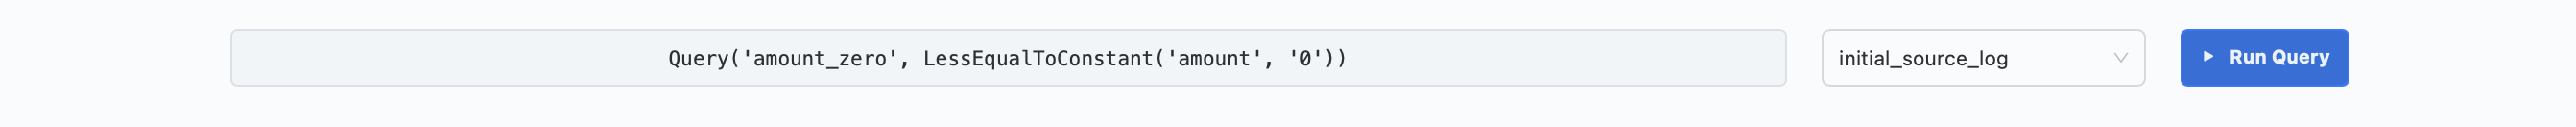


##### Executing the Query
After configuring your query, click on the "Run Query" button. The Query Builder UI will process the query and display the results directly within the interface.

Loading Results: Initially, the Query Builder UI will display the first 10 rows of the result. This helps you quickly view the output without overwhelming the system with large datasets.

Loading More Rows: If you want to see more rows, you can use the "Load Next 10 Rows" button to load more data or "Load Full Table" to display the entire result set.

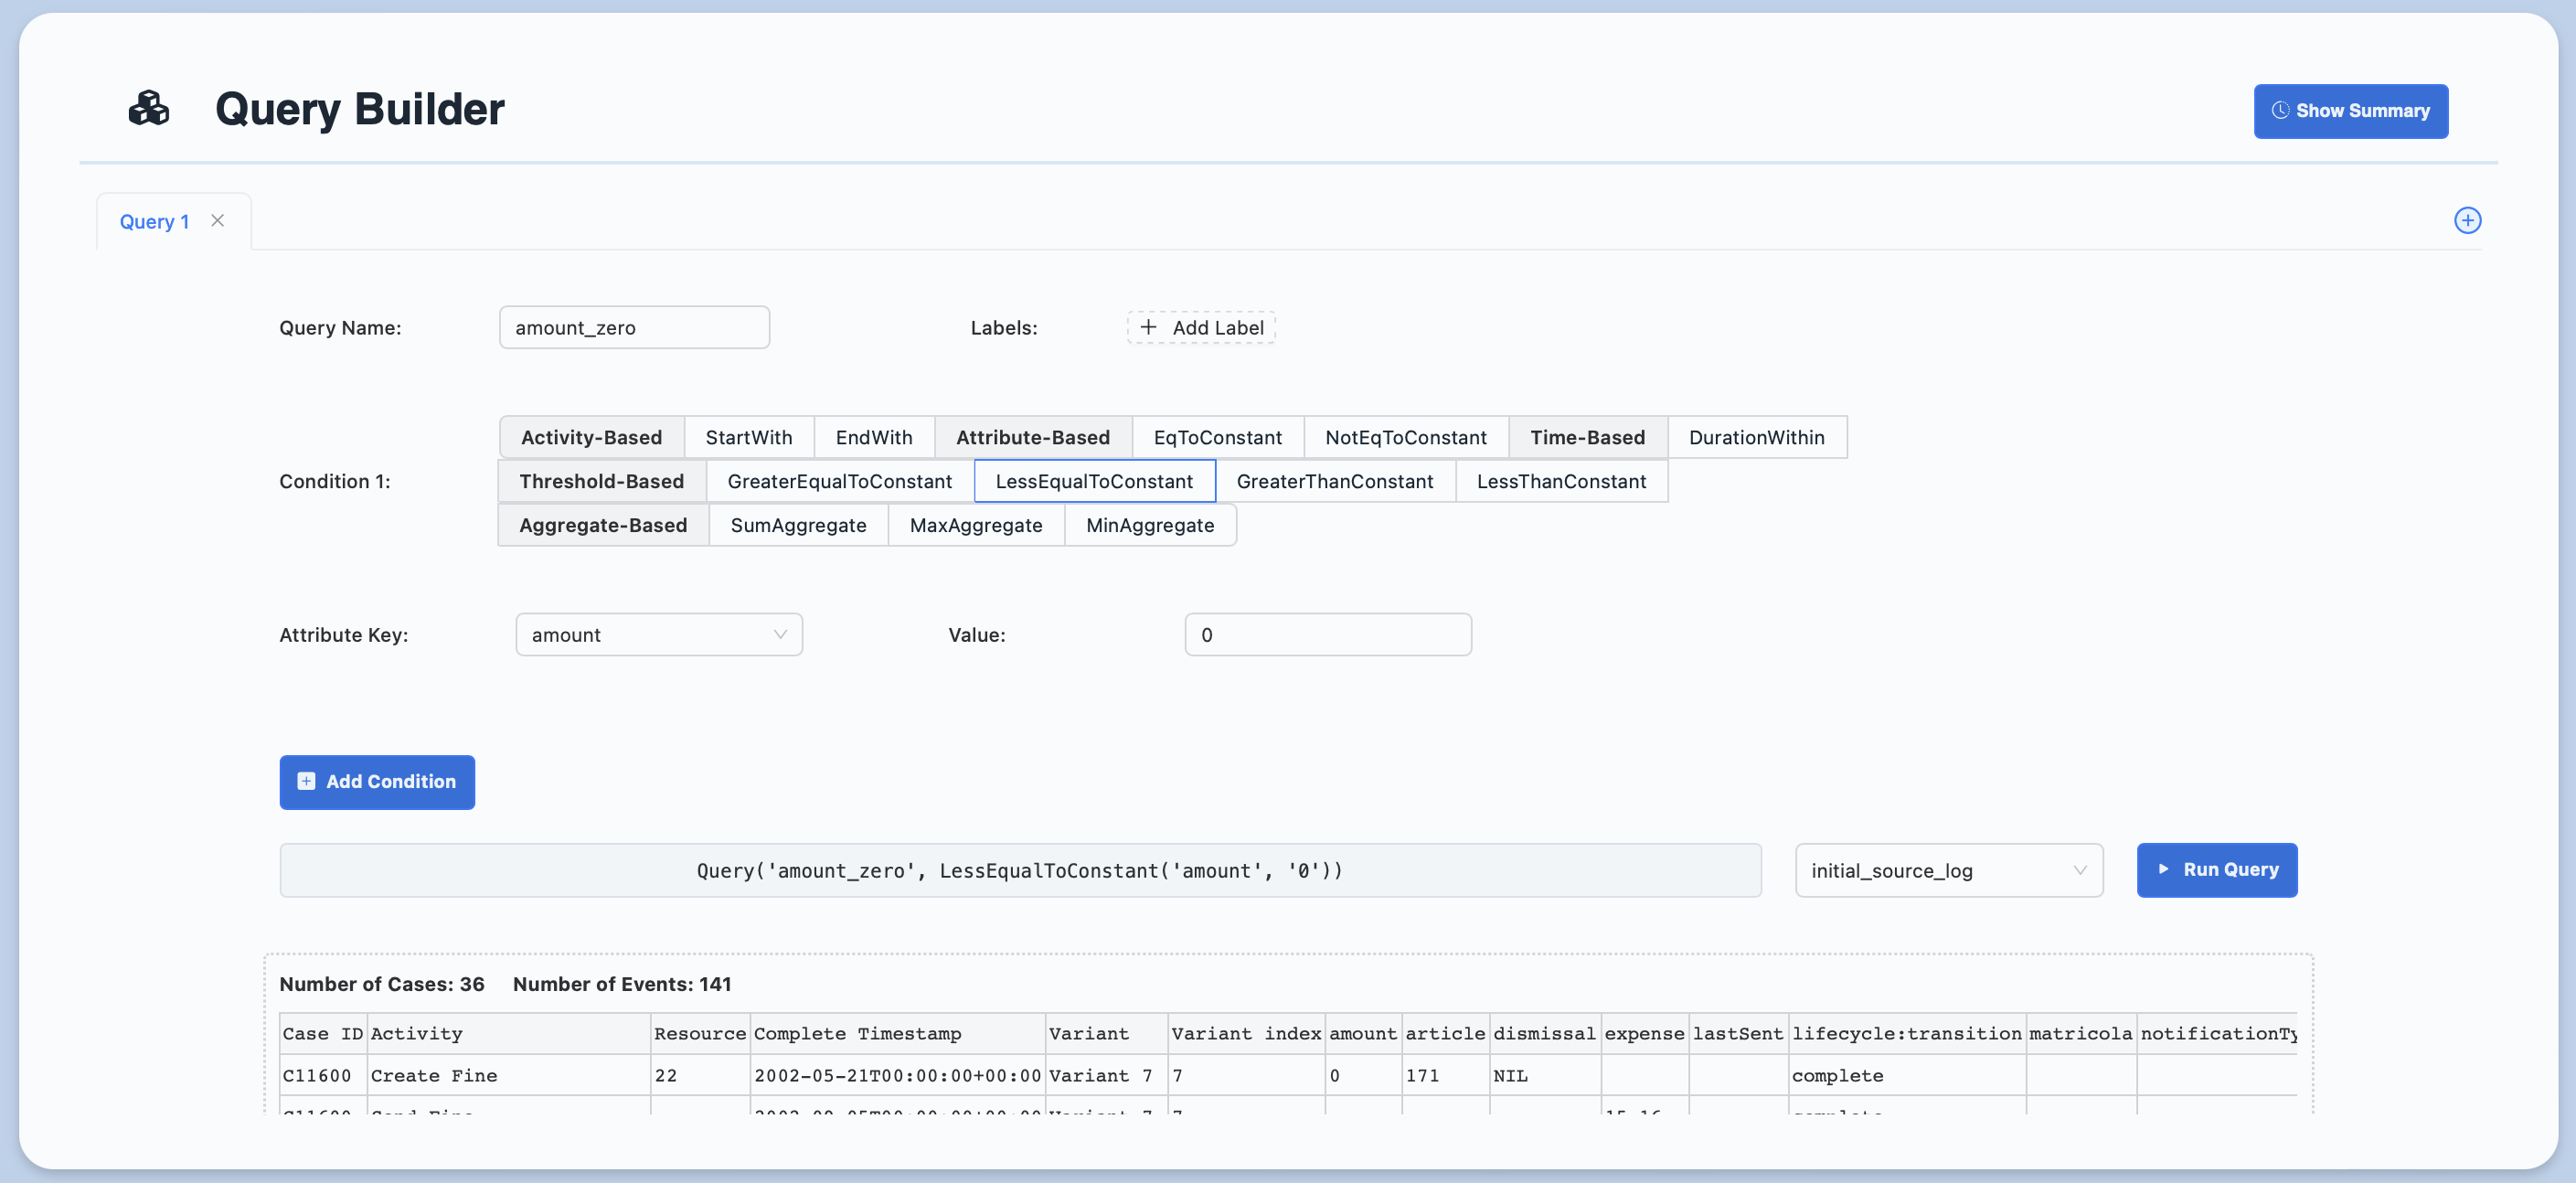



#### Add and remove a condition

You can refine your query by adding/removing conditions to further filter the log data.

- Click `Add Condition` to add another predicate : When you add multiple conditions in the Query Builder, an AND operation is automatically applied between them. This means that all conditions you define must be true for the cases to be included in the query result.

For example, in the case of query scc_and_no_payment:

- The first condition is EqToConstant for the Activity 'Send for Credit Collection'.
- The second condition is NotEqToConstant for the Activity 'Payment'.

These two conditions are connected with an implicit AND. Thus, the query retrieves cases that contain the 'Send for Credit Collection' activity and do not contain any events with the 'Payment' activity.


- `Remove Condition` using the delete buttons next to each condition.


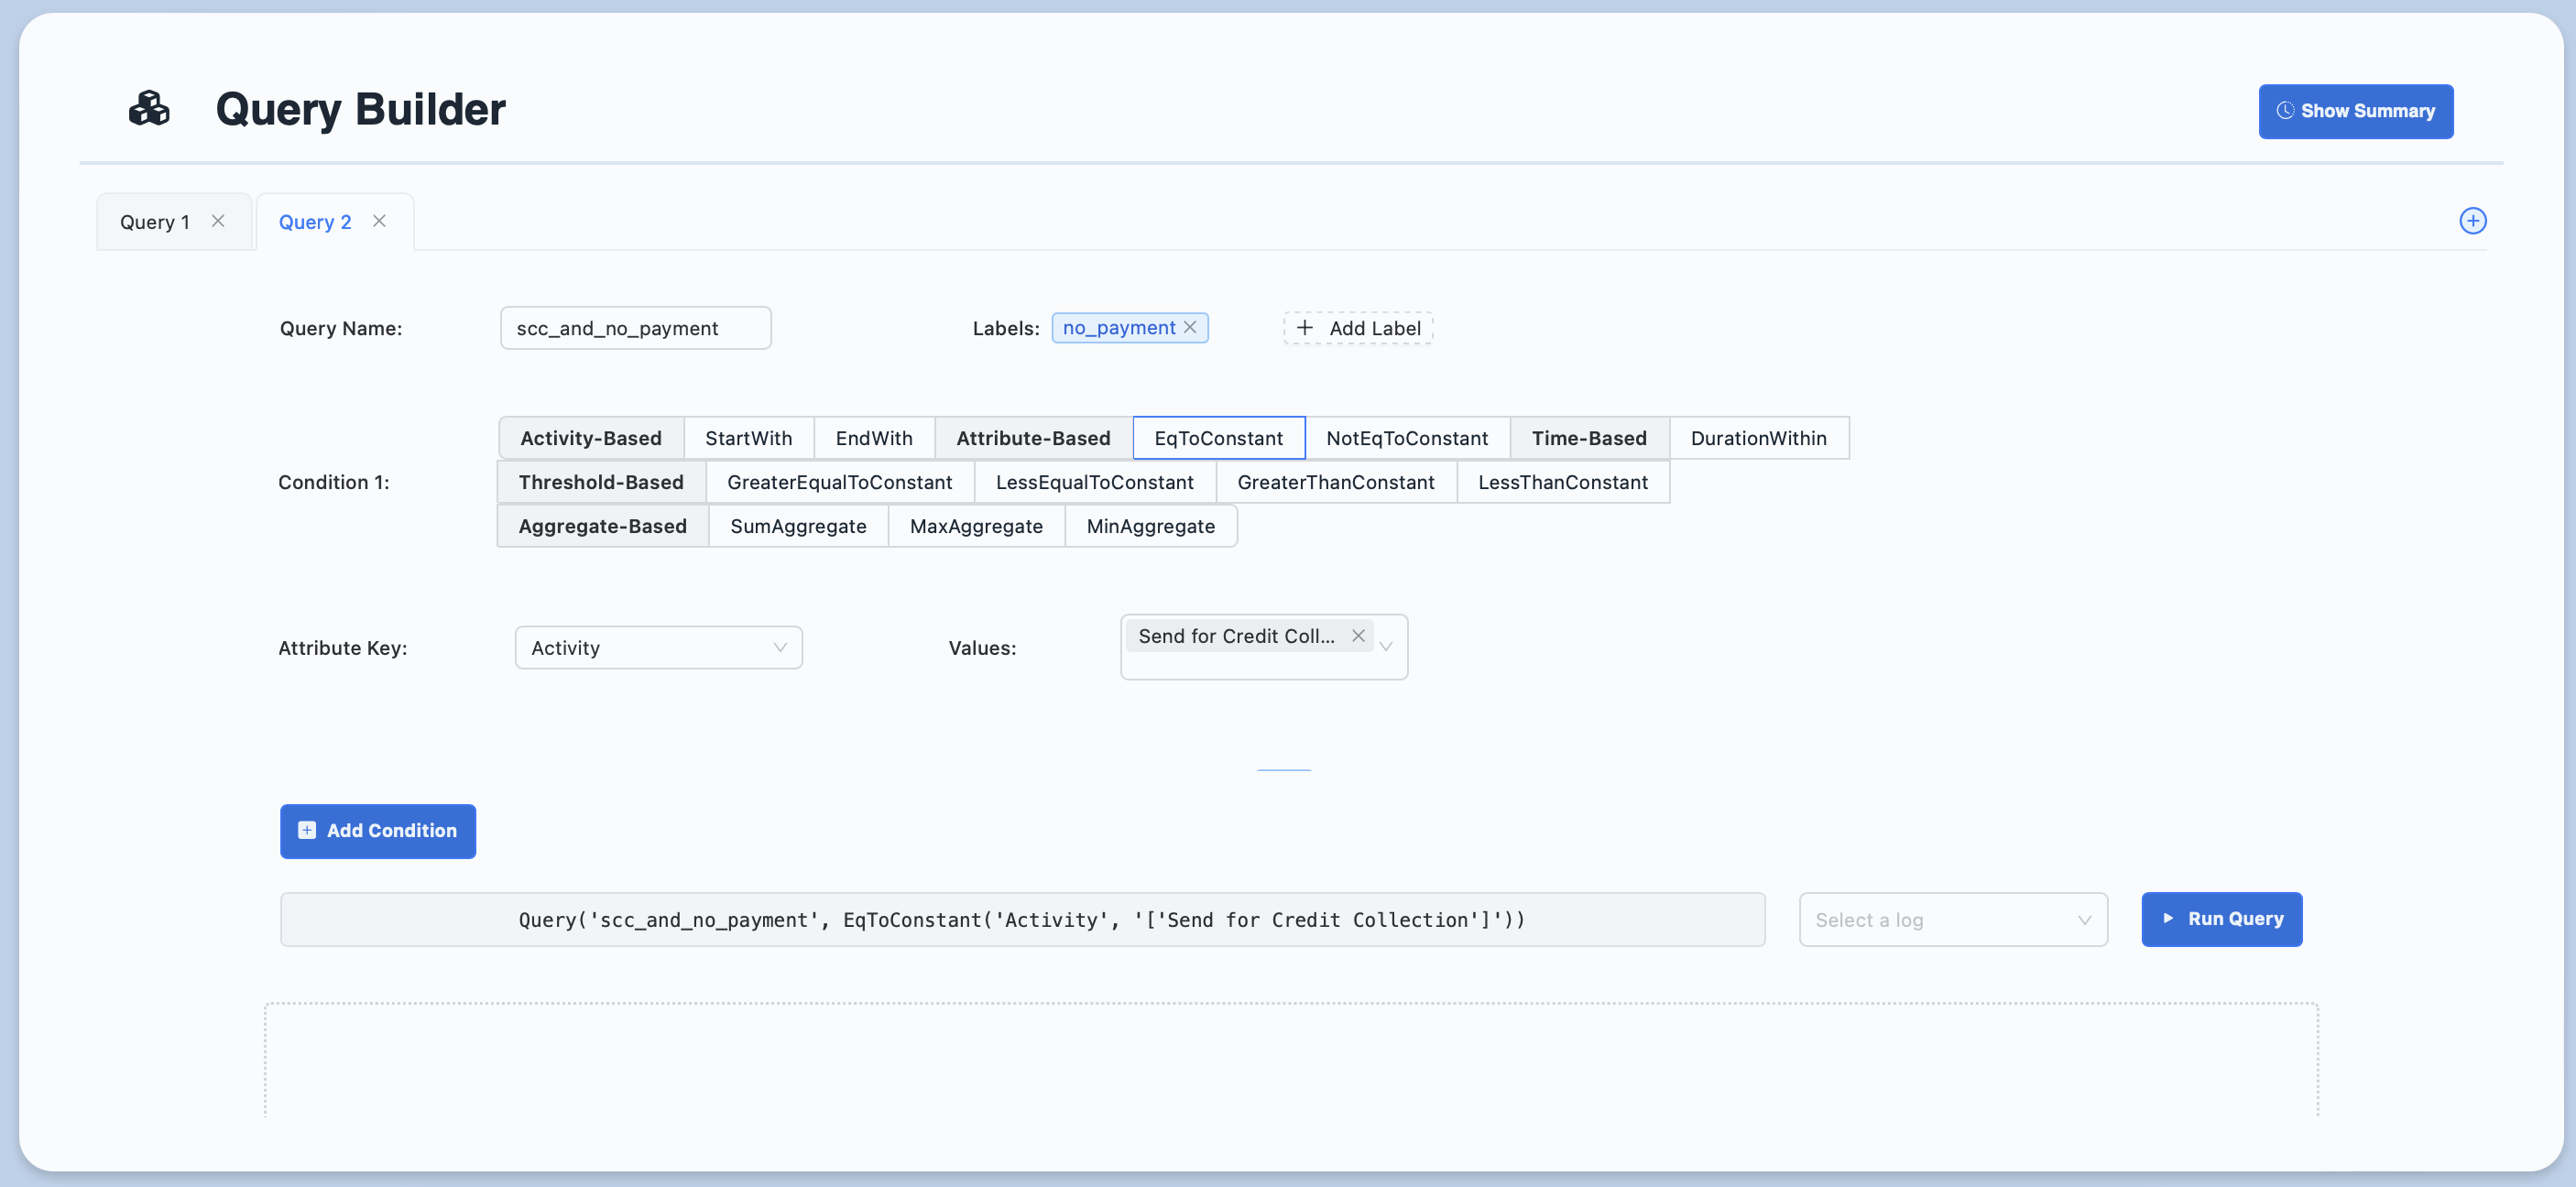

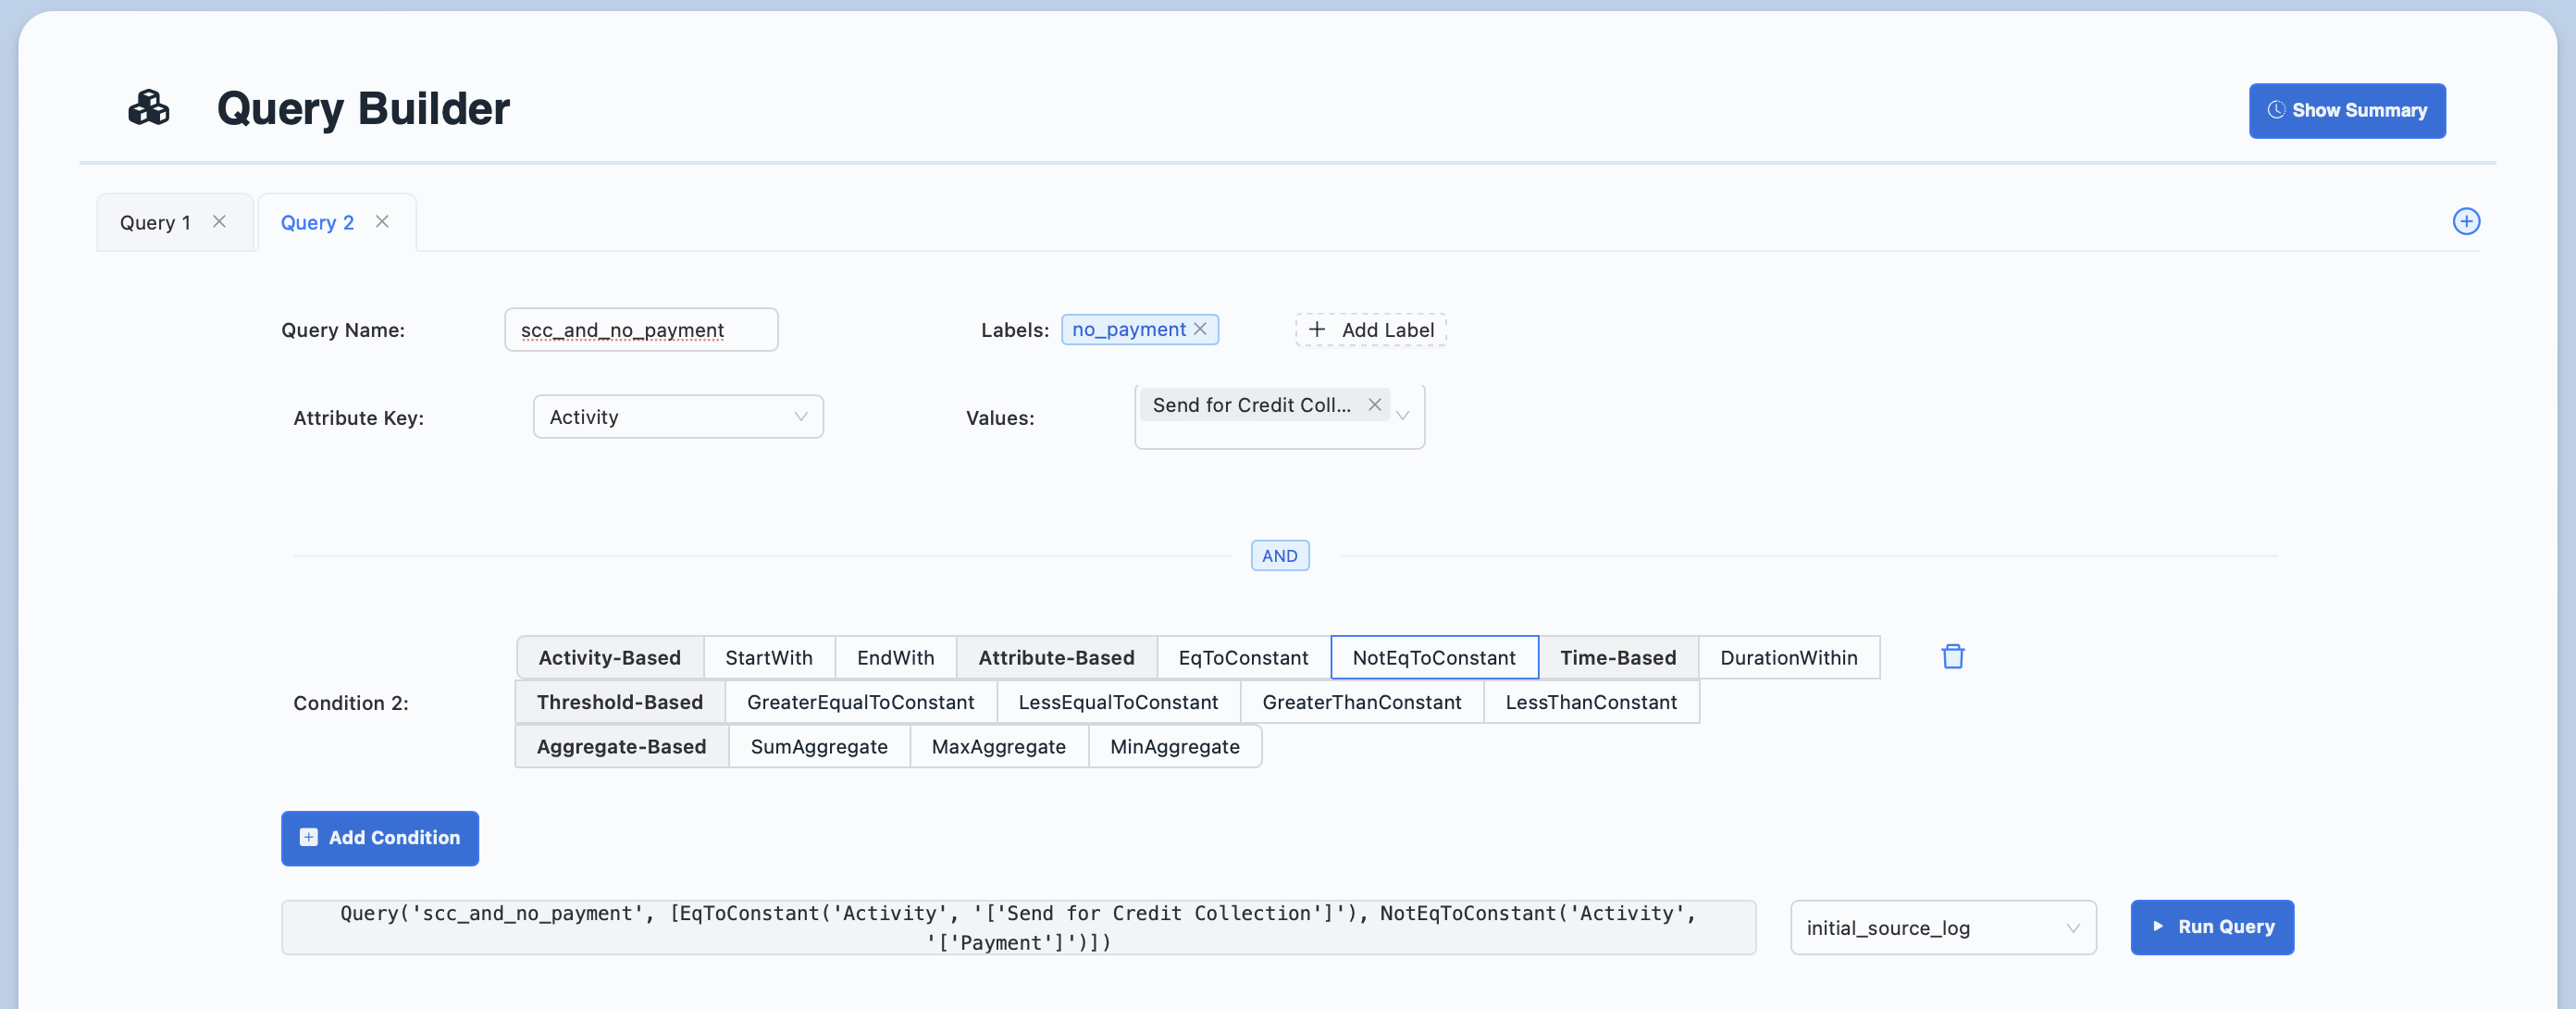


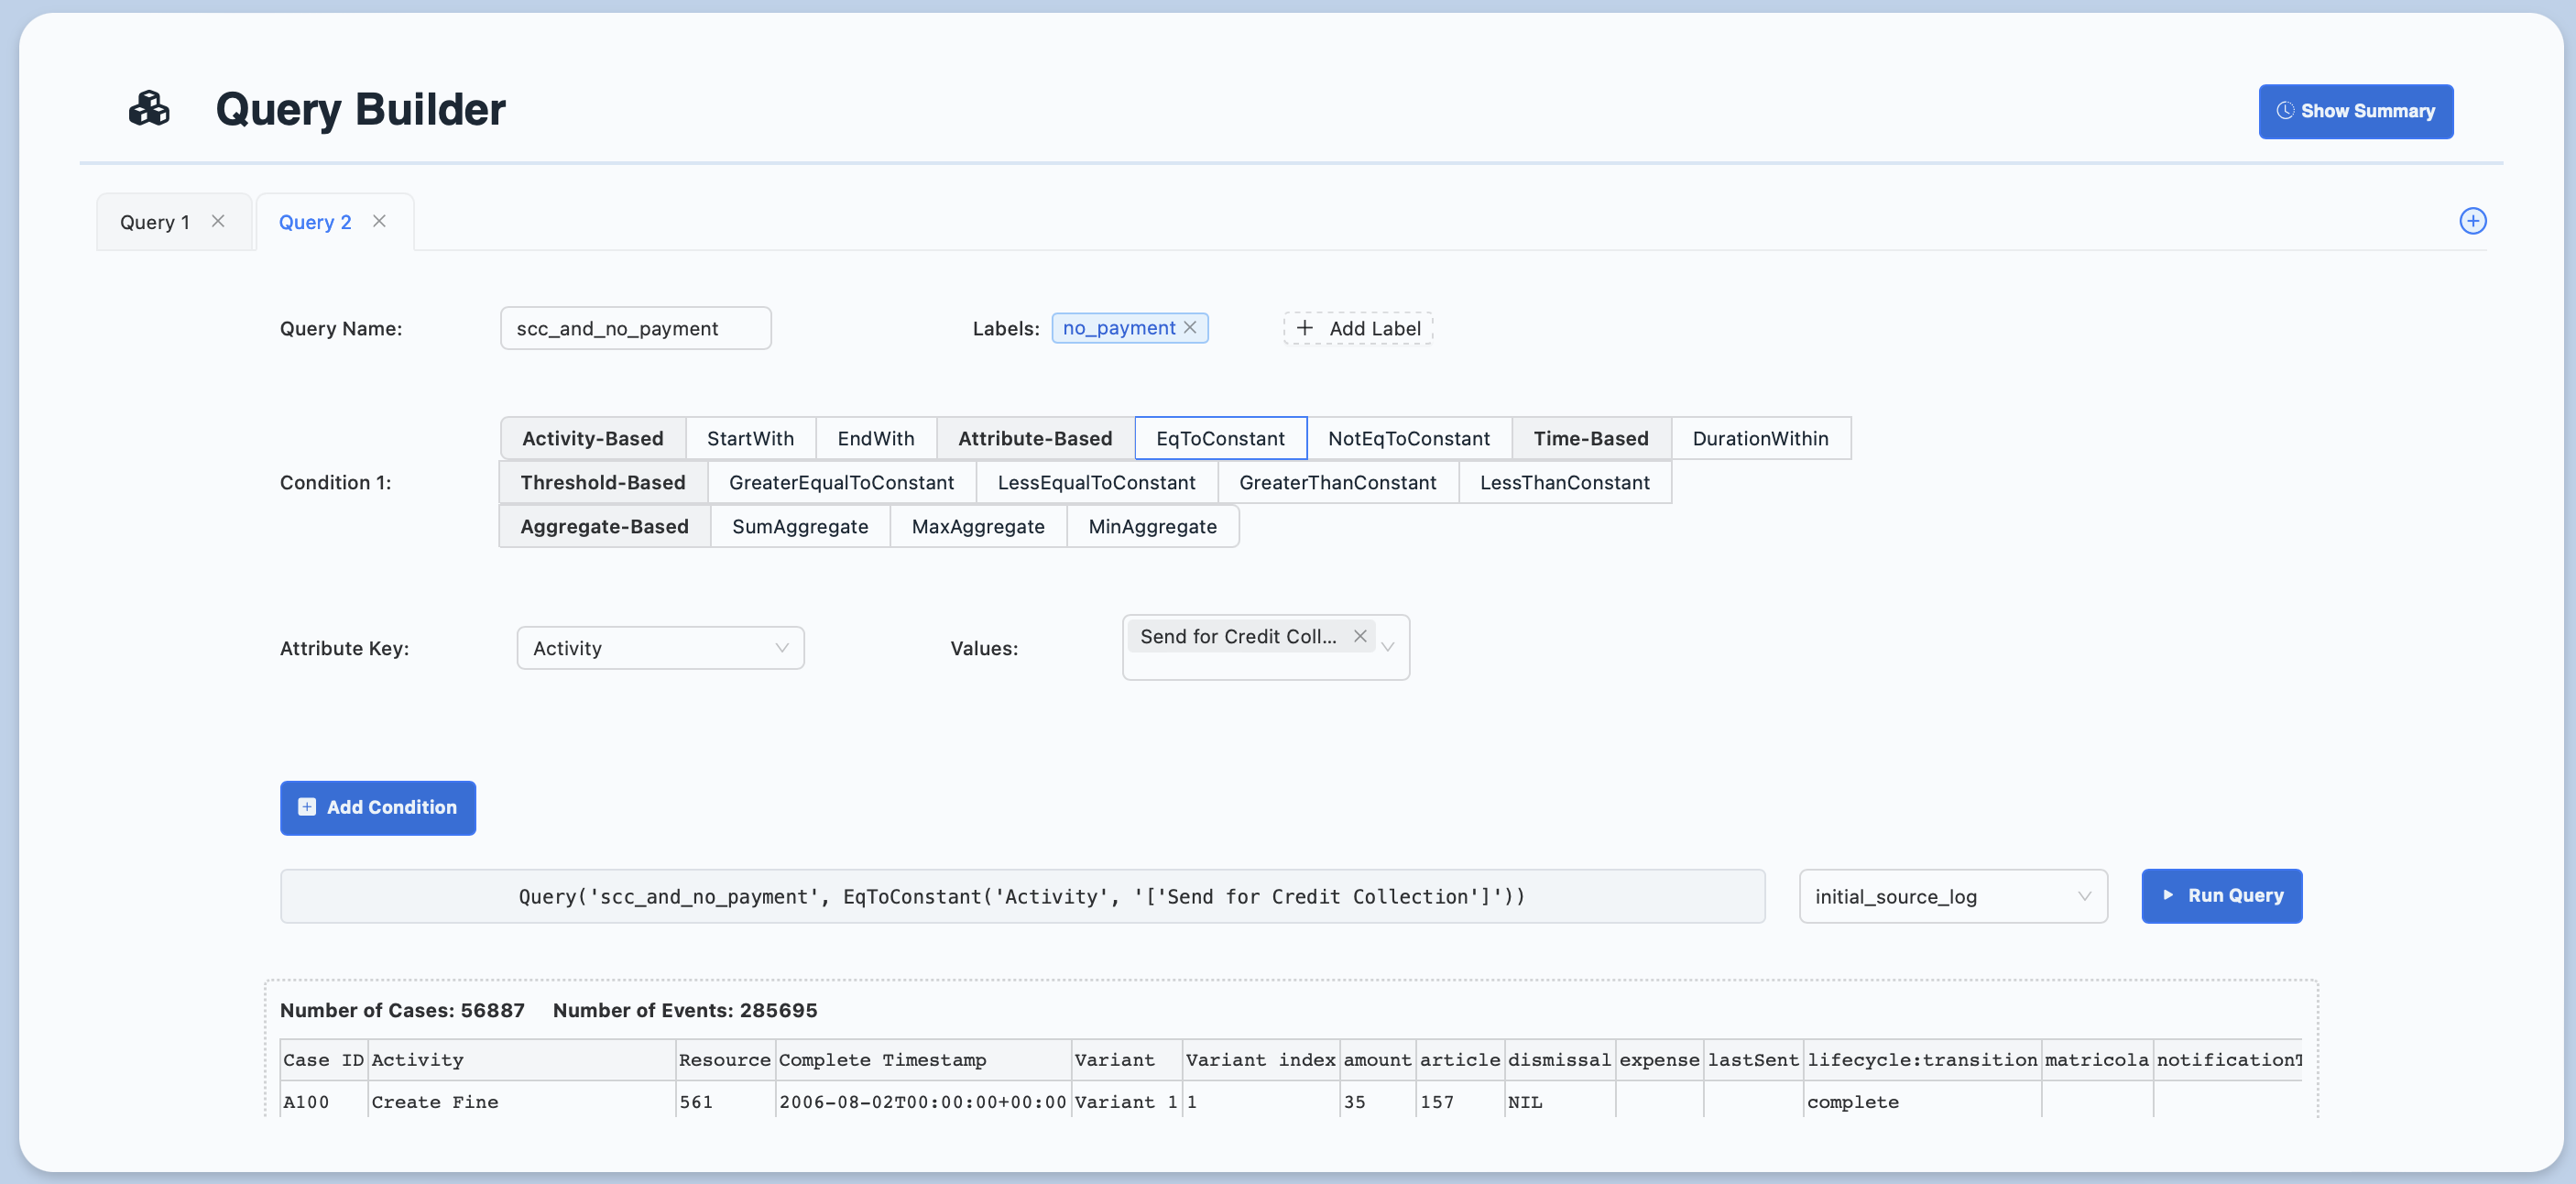


##### Running the Multiple Conditions Programmatically:

In [9]:
from logview.predicate import *

#  Find all cases that end with activity Payment or Send for Credit Collection
query_t = Query('SCC_and_no_Payment', [EqToConstant('Activity', 'Send for Credit Collection'), NotEqToConstant('Activity', 'Payment')])
result_set_query_t, complement_t = vel_instance.log_view.evaluate_query('rs_SCC_and_no_Payment', vel_instance.log, query_t)

result_set_query_t

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
2,A100,Create Fine,561.0,2006-08-02 00:00:00+00:00,Variant 1,1,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A100,Create Fine,2006-08-02 00:00:00+00:00,2,1
3,A100,Send Fine,NaN,2006-12-12 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,11.00,...,NaN,NaN,NaN,NaN,NaN,A100,Send Fine,2006-12-12 00:00:00+00:00,3,1
4,A100,Insert Fine Notification,NaN,2007-01-15 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+00:00,4,1
5,A100,Add penalty,NaN,2007-03-16 00:00:00+00:00,Variant 1,1,71.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Add penalty,2007-03-16 00:00:00+00:00,5,1
6,A100,Send for Credit Collection,NaN,2009-03-30 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+00:00,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,V9999,Create Fine,25.0,2002-09-07 00:00:00+00:00,Variant 1,1,131.0,142.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,V9999,Create Fine,2002-09-07 00:00:00+00:00,561465,150369
561466,V9999,Send Fine,NaN,2002-10-25 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,15.16,...,NaN,NaN,NaN,NaN,NaN,V9999,Send Fine,2002-10-25 00:00:00+00:00,561466,150369
561467,V9999,Insert Fine Notification,NaN,2002-11-04 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,V9999,Insert Fine Notification,2002-11-04 00:00:00+00:00,561467,150369
561468,V9999,Add penalty,NaN,2003-01-03 00:00:00+00:00,Variant 1,1,262.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,V9999,Add penalty,2003-01-03 00:00:00+00:00,561468,150369


When multiple values are selected in a predicate, an implicit `OR` operation is applied between them. This is possible for the predicates `StartWith`, `EndWith`, `EqToConstant`, `NotEqToConstant`.


For the example below, the query will keep cases that start with any of these three activities (Create Fine, Send Fine, or Insert Fine Notification). Any case that starts with at least one of these activities will satisfy this condition.

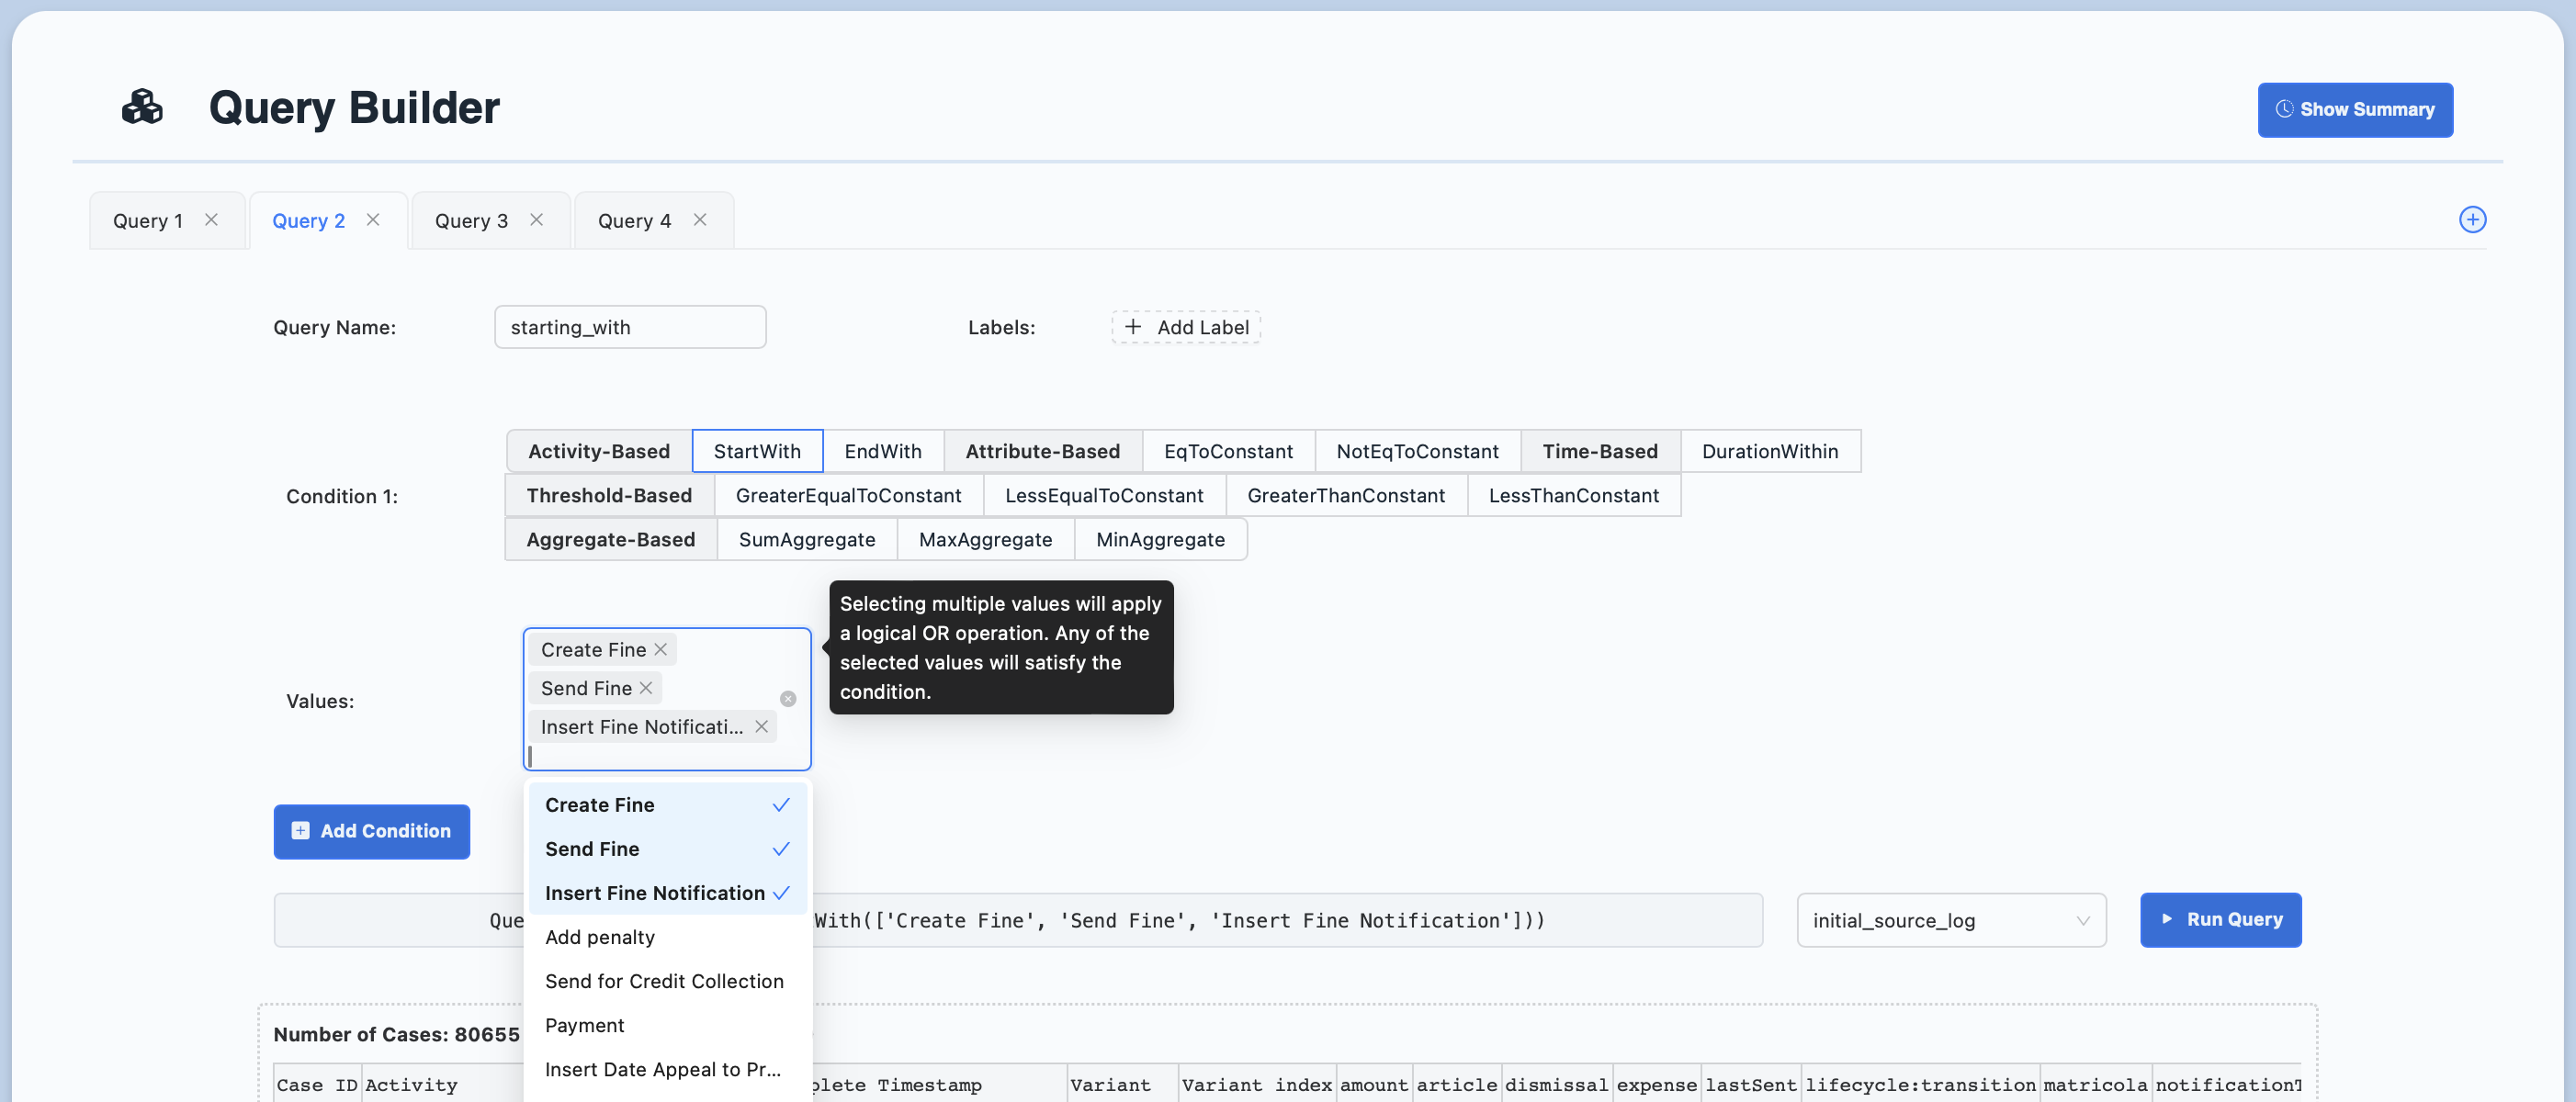


##### Running the Query Programmatically:
To execute a similar query using the LogView framework, you can create a query with the StartWith predicate and multiple values.

Below is the code that achieves this:

In [8]:
from logview.predicate import *


query_s = Query('rs_act', [StartWith(['Create Fine', 'Send Fine', 'Insert Fine Notification'])])

result_set, comp_set = vel_instance.log_view.evaluate_query('rs_act', vel_instance.log, query_s)
result_set

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,amount,article,dismissal,expense,...,notificationType,paymentAmount,points,totalPaymentAmount,vehicleClass,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,A1,Create Fine,561.0,2006-07-24 00:00:00+00:00,Variant 3,3,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A1,Create Fine,2006-07-24 00:00:00+00:00,0,0
1,A1,Send Fine,NaN,2006-12-05 00:00:00+00:00,Variant 3,3,NaN,NaN,NaN,11.00,...,NaN,NaN,NaN,NaN,NaN,A1,Send Fine,2006-12-05 00:00:00+00:00,1,0
2,A100,Create Fine,561.0,2006-08-02 00:00:00+00:00,Variant 1,1,35.0,157.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,A100,Create Fine,2006-08-02 00:00:00+00:00,2,1
3,A100,Send Fine,NaN,2006-12-12 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,11.00,...,NaN,NaN,NaN,NaN,NaN,A100,Send Fine,2006-12-12 00:00:00+00:00,3,1
4,A100,Insert Fine Notification,NaN,2007-01-15 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+00:00,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,V9999,Create Fine,25.0,2002-09-07 00:00:00+00:00,Variant 1,1,131.0,142.0,NIL,NaN,...,NaN,NaN,0.0,0.0,A,V9999,Create Fine,2002-09-07 00:00:00+00:00,561465,150369
561466,V9999,Send Fine,NaN,2002-10-25 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,15.16,...,NaN,NaN,NaN,NaN,NaN,V9999,Send Fine,2002-10-25 00:00:00+00:00,561466,150369
561467,V9999,Insert Fine Notification,NaN,2002-11-04 00:00:00+00:00,Variant 1,1,NaN,NaN,NaN,NaN,...,P,NaN,NaN,NaN,NaN,V9999,Insert Fine Notification,2002-11-04 00:00:00+00:00,561467,150369
561468,V9999,Add penalty,NaN,2003-01-03 00:00:00+00:00,Variant 1,1,262.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,V9999,Add penalty,2003-01-03 00:00:00+00:00,561468,150369


## View the Registry ##
The **Registry** is the backbone of the framework, allowing users to record queries made during analysis, along with their evaluations by the **Query Evaluator**.\
The registry also facilitates access to all recorded information.

The user can access the registry at any time during the analysis using the following method.

In [11]:
vel_instance.log_view.get_summary()

+----+--------------------+-------------+----------------+--------------+
|    | source_log         | query       | result_set     | labels       |
|----+--------------------+-------------+----------------+--------------|
|  0 | initial_source_log | amount_zero | rs_amount_zero | [['unpaid']] |
|  1 | initial_source_log | no_payment  | rs_no_payment  | [[]]         |
|  2 | rs_amount_zero     | act_        | rs_act_        | [[]]         |
+----+--------------------+-------------+----------------+--------------+
+----+-------------+-----------------------------------------------------------------------------------+
|    | query       | predicates                                                                        |
|----+-------------+-----------------------------------------------------------------------------------|
|  0 | amount_zero | (amount <= 0.0)                                                                   |
|  1 | no_payment  | (Activity in { 'Send Appeal to Prefecture

{'evaluations':            source_log        query      result_set      labels
 0  initial_source_log  amount_zero  rs_amount_zero  [[unpaid]]
 1  initial_source_log   no_payment   rs_no_payment        [[]]
 2      rs_amount_zero         act_         rs_act_        [[]],
 'queries':          query                                         predicates
 0  amount_zero                                    (amount <= 0.0)
 1   no_payment  (Activity in { 'Send Appeal to Prefecture' }) ...
 2         act_      (Activity in { 'Send Appeal to Prefecture' })}

#### Viewing the Registry in VelUI

The Query Builder UI provides a summary view where you can see a summary of all executed queries, it includes:

- The query string.
- The label.
- The result set name and the source log used.
- This summary helps you keep track of your queries and their outcomes that can be used later

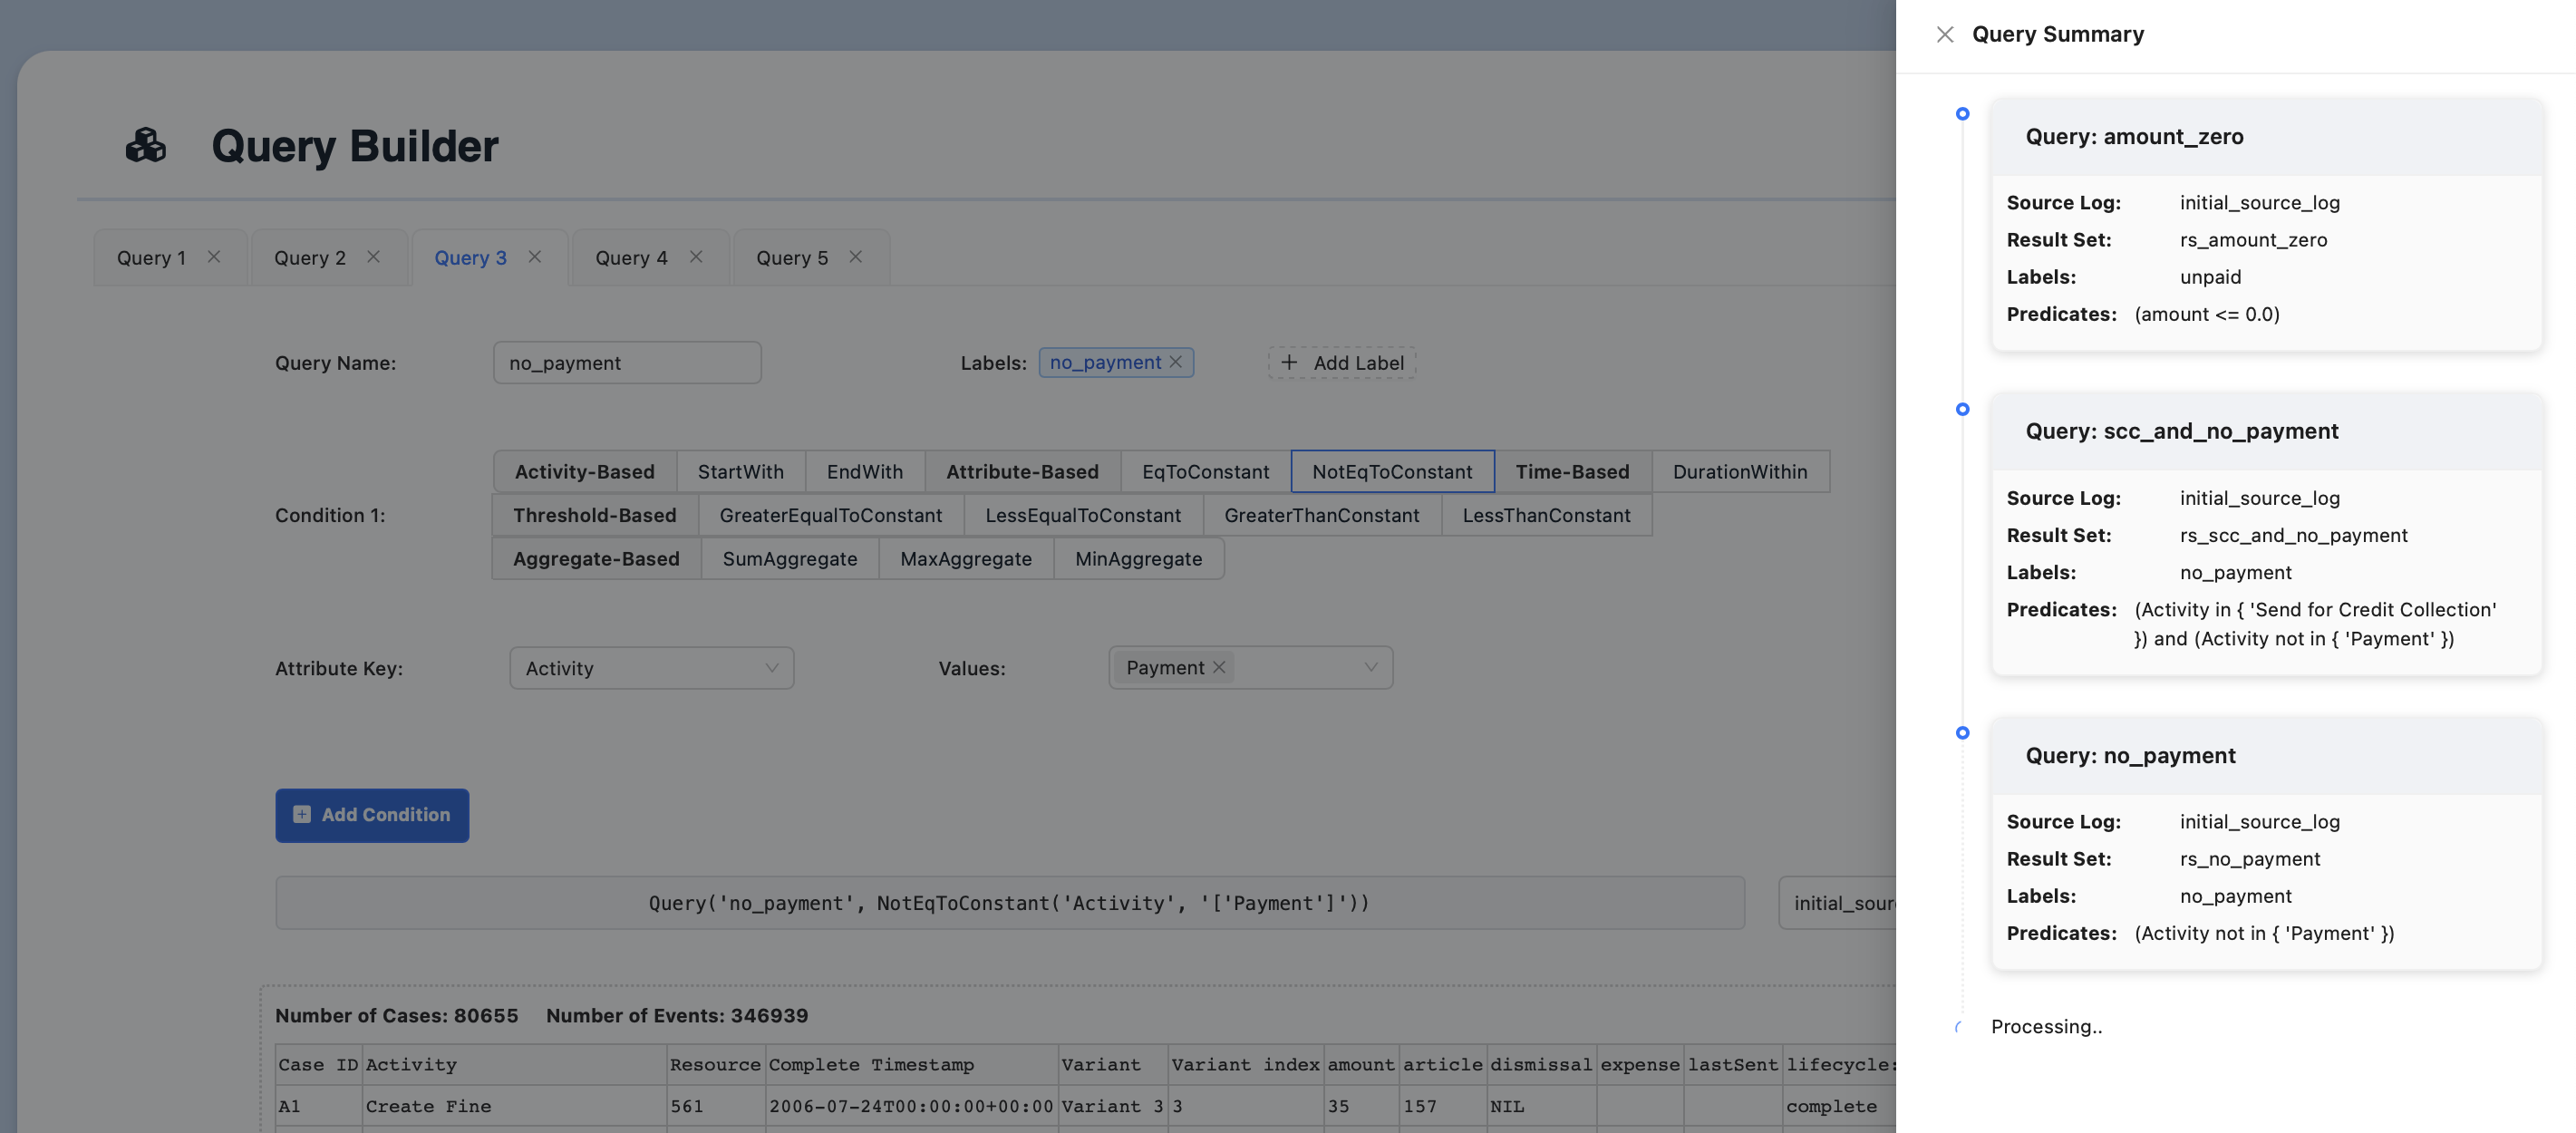


